# Lesson 1 - Fundamentals (part 1)

**Goal**
After this first lesson, you should:
1. Know how to setup a working python environment on your computer using anaconda
2. Understand the following concepts:
    - variance
    - bias
    - overfitting
    - underfitting
-----

### Setting up Python

If you have not already setup a python environment, you should do so know:

**MacOs installation**
https://conda.io/docs/user-guide/install/macos.html

**Windows installation**
https://conda.io/docs/user-guide/install/windows.html

You can test that you succeeded by opening a terminal prompt and typing:

    jupyter notebook
    
Success will open a new tab in your default browser which has a notebook that looks like this one

### Understanding Numpy and Pandas

[numpy](http://www.numpy.org/) and [pandas](https://pandas.pydata.org/) are libraries which help manipulate data in a structured manner. These libraries provide datastructures and algorithms that help manipulate data.

Since we installed numpy and pandas using anaconda and the [conda package manager](https://conda.io/docs/index.html), we have access to all the libraries we will need.

In [2]:
# First, we always need to include our libraries
import numpy as np

In [19]:
# Let's learn some basic operations with the numpy library
########################

# Create a 1D array
a = np.array([1,2,3,4])

# Create a 2D matrix
b = np.matrix([[1,2],[3,4]])

# Create a 2D identity matrix with 4 rows
c = np.eye(4)

# Scalar multiplication
5 * a

# matrix multiplication
print(a)
print(b)

[1 2 3 4]
[[1 2]
 [3 4]]


Let's try and perform the following matrix calculation using numpy.

Calculate $A$, where $
A = 
   \begin{bmatrix} 
      0 & 1 \\
      1 & 0 \\ 
   \end{bmatrix}
   \begin{bmatrix}
      3 \\
      4 \\
   \end{bmatrix}
$



In [29]:
# Answer
b = [[0, 1],
     [1, 0]]
c = [3, 4]
A = np.matrix(b).dot(np.array(c))
# A = np.matrix(b) * np.array(c)
print(A)

[[4 3]]


___

In [30]:
# There are many algorithms which numpy provides.
######################

# Take the dot product of two arrays
arr1 = np.array([1,2,3])
arr2 = np.array([4,5,6])

np.dot(arr1,arr2)

# Generate an array from a specified range
arr3 = np.arange(10)

# Shuffle an array
np.random.shuffle(arr3)

# Generate a random integer
r1 = np.random.randint(1,10)

You can discover many more algorithms that numpy supports here:
https://docs.scipy.org/doc/numpy-1.13.0/reference/


### Basic Application and Review

> Let's use numpy to simulate coin flips and dice rolls.

Assume you flip 5 fair coins (i.e. the probability of a coin landing on one side is 0.5). Write a small function which will determine the _estimated probability_ that at most 3 coins will be heads or exactly 1 coin lands on heads.

In [44]:
def flip_coins():
    trials = 100000
    results = 0
    for i in range(0, trials):
        each_try = np.random.randint(0, 2, size=5)
        if sum(each_try) <= 3 and sum(each_try) > 0:
            results += 1
    return results/trials
flip_coins()

0.78038

In [54]:
# Challenge problem
# Write a function which takes N dice and returns the estimated probability
# that the total score is greater than 11 or odd

## WRITE YOUR SOLUTION HERE
def roll_dices(N):
    trials = 100000
    result = 0
    for i in range(trials):
        rolling = np.random.randint(1, 7, size=N)
        sum_rolling = sum(rolling)
        if (sum_rolling > 11) or (sum_rolling % 2):
            result += 1
    
    return result/trials
roll_dices(4)

0.90113

## Variance

Given a set of data, we can use a few techinques to determine the "shape" of the data.

Assume we have the following set of data $X = \{x_1, x_2, x_3, ..., x_n\}$.

> **arithmetic mean**
The arithmetic mean is defined as $\overline{X} = \frac{1}{n}(x_1 + x_2 + x_3 + ... + x_n)$
    
> **median**
The median is defined as the $M = x_{\frac{n}{2}}$ if $n$ is odd. Otherwise, we take the average of the middle two numbers in an _ordered_ set.

2.676880229460275e-05
2.0471111814741962e-05


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.00

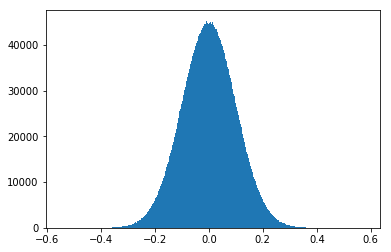

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

samples = 10000000
nrml_data_set = np.random.normal(0, 0.1, samples)
print(np.mean(nrml_data_set))
print(np.median(nrml_data_set))
plt.hist(nrml_data_set, bins=1000)

# scan the documentation for the `mean` and `median` functions calculate the mean and median

# Do you notice anything about the mean and the median?

# Using the np.random.normal function, generate a few datasets and compare the median and mean
# for each dataset.

The variance of a dataset measure how **spread apart** the data are from eachother.

Which histograms do you think display _high variance_, which have _low variance_?
![variance example](https://qph.fs.quoracdn.net/main-qimg-e58c4ef2d7591f651e6f6e19d8550fae)

Formally, we calculate the variance as the _normalized sum of the squares of each data's magnitude from the mean_. In other words, we:
    1. look at every data point
    1. calculate how far away it is from the mean
    1. square each difference and sum them all together
    1. normalize by the total number of data points
    
$$
\sigma^2 = \frac{\sum{(x_i - \overline{x})^2}}{n}
$$

> **Notice** that the variance is in squared units. People will often take the square root of the variance in order to have a quantity with the same unit as the mean. We call this value the _standard deviation_.

$$
\text{SD}  = \sqrt{\sigma^2}
$$

In [63]:
# We will use another library called pandas to load in our data.
# Pandas is built on top of numpy and supports it's functionality
import pandas as pd

In [64]:
salary_data = pd.read_csv('Salaries.csv', low_memory=False)

# Examine the data
list(salary_data.columns.values)

['Id',
 'EmployeeName',
 'JobTitle',
 'BasePay',
 'OvertimePay',
 'OtherPay',
 'Benefits',
 'TotalPay',
 'TotalPayBenefits',
 'Year',
 'Notes',
 'Agency',
 'Status']

In [66]:
# Extract the TotalPay column into an array so we may analyze it
total_pay = salary_data.loc[:,"TotalPay"]

In [68]:
# calculate the mean, median, variance and standard deviation of
# the total pay and base pay data sets
np.std(total_pay)
total_pay.describe()

## WORK HERE

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

### Bias

In reality, whenever we collect data, there is an inherent randomness. If you repeat an experiment many times, you may get slightly different data every time. The error will not be corrected if we average out these results, and we call this error **bias**.


**In other words:**

_Bias_ is what happens when we fail to take information into account or have incorrect assumptions. 

> Discussion time. Can you think of examples of how bias may have affected our salary data set above?

### Overfitting and Underfitting

When we build models, we want to build models which are specific enough that they yield relevant predictions, but also general enough that they can be applied to new an unseen datasets.

If a model is too specific to the data, we are unable to generalize the results, and we call this **overfitting**

If a model is not specific enough to yield meaningful predictions, we call this **underfitting**

> regression models

![fit curves](https://qph.ec.quoracdn.net/main-qimg-b4112b5d856f4f0da349460aeed854d8)

> classification models

![more fit curves](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/fittings.jpg)

> Discussion time.

    - Why is underfitting and overfitting undesirable?
    - Can you think of ways that we may inadvertently overfit data?
    - How might we underfit data?

### Bias Variance Tradeoff

> IMPORTANT!!

There is a fundamental property which states that error of a model is directly related to the sum of the **variance** and the **bias**^2.

![variance tradeoff](https://www.researchgate.net/profile/Ljubomir_Jacic2/post/How_does_model_complexity_impact_the_bias-variance_tradeoff/attachment/59d6233579197b807798188f/AS%3A306150770184192%401450003439733/image/biasvariance.png)